# Imports

In [42]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import matplotlib.patches as mpatches
from matplotlib.patches import Circle
from matplotlib.lines import Line2D

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.cluster import KMeans, DBSCAN
from sklearn.neighbors import NearestNeighbors
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_fscore_support, accuracy_score
import sklearn.discriminant_analysis as DA
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression

import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

# Introduction

In this preliminary work, we will visualize the data and draw some first results.

## Data filtering

As we have different csv files containing the data, the first thing to do is to merge them together.

In [43]:
# First, we import the four csv files that we are going to use
df1 = pd.read_csv("./data/caracteristics.csv", encoding='latin-1')
df2 = pd.read_csv("./data/places.csv", encoding="latin-1")
df3 = pd.read_csv("./data/users.csv", encoding="latin-1")
df4 = pd.read_csv("./data/vehicles.csv", encoding="latin-1")

# Then, we merge all the dataframes together using the column 'Num_Acc' that they have in common
df1 = pd.merge(df1, df2, how="outer", on="Num_Acc")
df2 = pd.merge(df3, df4, how='outer', on="Num_Acc")

initial_data = pd.merge(df1, df2, how='outer', on="Num_Acc")

Then we filter it by selecting only the columns we are interested in.

In [44]:
# Here, we select the columns that we want to keep and we rename it appropriately
columns = ['an', 'mois', 'catu', 'grav', 'sexe', 'an_nais', 'trajet', 'secu', 'lum', 'atm', 'catr', 'surf']

data = initial_data[columns]
data.columns = ['Year', 'Month', 'User category', 'Severity', 'Sex', 'Year of birth', 'Trip purpose', 'Securiy', 'Luminosity', 'Weather', 'Type of road', 'Road surface']

data

,Year,Month,User category,Severity,Sex,Year of birth,Trip purpose,Securiy,Luminosity,Weather,Type of road,Road surface
0,5,1,1,4,1,1976.0,1.0,11.0,3,1.0,3.0,1.0
1,5,1,1,4,1,1976.0,1.0,11.0,3,1.0,3.0,1.0
2,5,1,1,3,2,1968.0,3.0,11.0,3,1.0,3.0,1.0
3,5,1,1,3,2,1968.0,3.0,11.0,3,1.0,3.0,1.0
4,5,1,2,1,1,1964.0,0.0,11.0,3,1.0,3.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
3553971,16,12,1,4,1,1967.0,3.0,21.0,1,1.0,2.0,1.0
3553972,16,12,2,4,1,1967.0,0.0,21.0,1,1.0,2.0,1.0
3553973,16,12,2,4,1,1967.0,0.0,21.0,1,1.0,2.0,1.0
3553974,16,12,1,1,1,1981.0,0.0,11.0,1,1.0,2.0,1.0


## Plots

First, we plot the number of accidents that occurred each month from January 2005 to December 2016

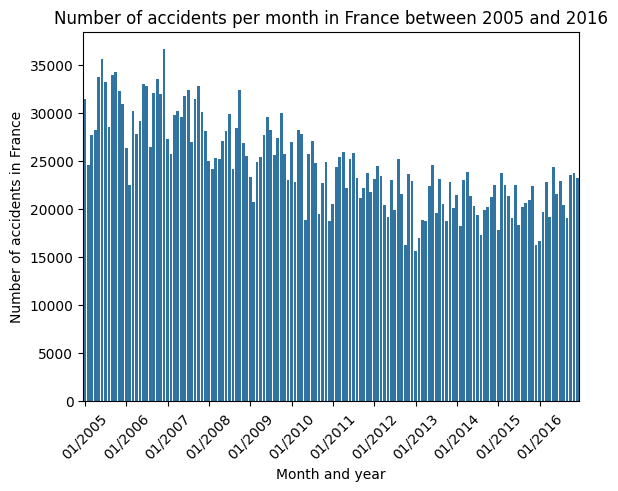

In [45]:
# We create a dataframe 'time' with only the information about the time of the accidents
time = data[['Year', 'Month']]

# We add a column 'Year-Month' containing the month and the year of the accident
time['Year-Month'] = time['Year'].astype('str') + " - " + time['Month'].astype('str')

# We plot first the number of accidents per month
plt.figure()

sns.countplot(data=time, x='Year-Month')

plt.xlabel("Month and year")
plt.ylabel("Number of accidents in France")
plt.xticks(ticks=[i for i in range(0, 144, 12)], labels=["01/"+ str(i) for i in range(2005,2017)], rotation=45)
plt.title("Number of accidents per month in France between 2005 and 2016")
plt.show()

We can observe that the number of accidents in France tend to increase along time. To verify this hypothesis, let’s plot the number of accidents through years:

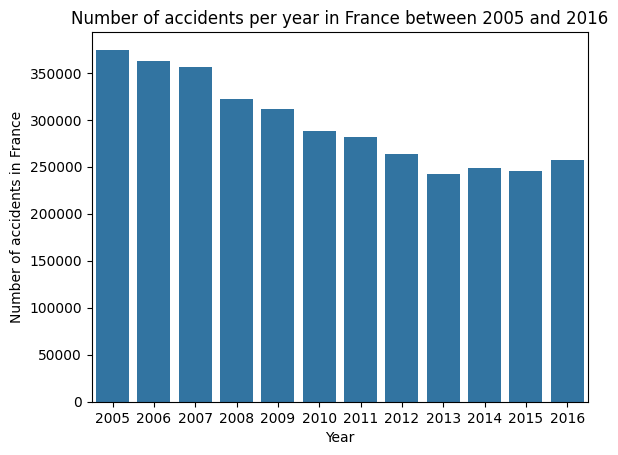

In [46]:
# We plot the number of accidents per year
plt.figure()

sns.countplot(data=time, x='Year')

plt.xticks(ticks=plt.xticks()[0], labels=range(2005,2017))
plt.ylabel("Number of accidents in France")
plt.title("Number of accidents per year in France between 2005 and 2016")
plt.show()

Paradoxically, we observe that the number of accidents per year decreases: from above 350000 in 2005 to approximately 250000 in 2016. If we look again at the first plot, we can observe that during the first years, the number of accidents through months is more regular than in the last years (where there are a lot of peaks). Then, maybe this contradiction is because in 2016 there are months during which the number of accidents is way bigger than during the others, so we have the impression that in the first plot the numbers of accidents increases whereas in reality it decreases through years.

Let’s now look at the number of accidents for each month:

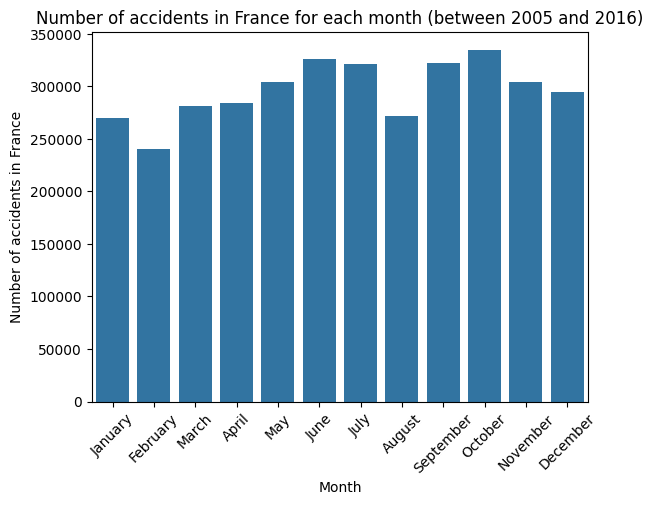

In [47]:
# We plot the number of accidents per month, no matter what the year is
plt.figure()

sns.countplot(data=time, x='Month')

plt.xticks(ticks=plt.xticks()[0], labels=['January', 'February','March','April','May','June','July','August','September','October','November',"December"], rotation=45)

plt.ylabel("Number of accidents in France")
plt.title("Number of accidents in France for each month (between 2005 and 2016)")
plt.show()

We could have thought about several hypothesis such as the fact that there will be a lot of accidents during the summer holidays (July and August) because more people are using the car to go in vacation, or the fact that in winter there are much more cars on the roads so it leads to more accidents, but we can see that these hypotheses are false. We observe that the peaks of accidents are reached in June, July, and October while the lowest numbers of accidents are reached in February and August.

# Introduction

## Data Filtering

In [48]:
# Selection of the columns that we want to keep that we rename appropriately
columns = ['an', 'mois', 'catu', 'grav', 'sexe', 'an_nais', 'trajet', 'secu', 'lum', 'atm', 'catr', 'surf']

data = initial_data[columns]
data.columns = ['Year', 'Month', 'User category', 'Severity', 'Sex', 'Year of birth', 'Trip purpose', 'Security', 'Luminosity', 'Weather', 'Type of road', 'Road surface']

# Calculate the mean of each feature (column)
means = data.mean(axis=1)

# Normalization of the data - Calculation of the standard deviation of each feature (column)
datanorm = StandardScaler().fit_transform(data)
datanorm = pd.DataFrame(datanorm, columns=['Year', 'Month', 'User category', 'Severity', 'Sex', 'Year of birth', 'Trip purpose', 'Security', 'Luminosity', 'Weather', 'Type of road', 'Road surface'])
datanorm

,Year,Month,User category,Severity,Sex,Year of birth,Trip purpose,Security,Luminosity,Weather,Type of road,Road surface
0,-1.435929,-1.678549,-0.498475,1.149756,-0.697267,0.193774,-0.757007,-0.349630,0.773626,-0.353534,-0.202657,-0.276017
1,-1.435929,-1.678549,-0.498475,1.149756,-0.697267,0.193774,-0.757007,-0.349630,0.773626,-0.353534,-0.202657,-0.276017
2,-1.435929,-1.678549,-0.498475,0.409444,1.434170,-0.254576,-0.009621,-0.349630,0.773626,-0.353534,-0.202657,-0.276017
3,-1.435929,-1.678549,-0.498475,0.409444,1.434170,-0.254576,-0.009621,-0.349630,0.773626,-0.353534,-0.202657,-0.276017
4,-1.435929,-1.678549,1.345582,-1.071180,-0.697267,-0.478751,-1.130700,-0.349630,0.773626,-0.353534,-0.202657,-0.276017
...,...,...,...,...,...,...,...,...,...,...,...,...
3553971,1.731358,1.569722,-0.498475,1.149756,-0.697267,-0.310620,-0.009621,0.223845,-0.579388,-0.353534,-1.001787,-0.276017
3553972,1.731358,1.569722,1.345582,1.149756,-0.697267,-0.310620,-1.130700,0.223845,-0.579388,-0.353534,-1.001787,-0.276017
3553973,1.731358,1.569722,1.345582,1.149756,-0.697267,-0.310620,-1.130700,0.223845,-0.579388,-0.353534,-1.001787,-0.276017
3553974,1.731358,1.569722,-0.498475,-1.071180,-0.697267,0.473993,-1.130700,-0.349630,-0.579388,-0.353534,-1.001787,-0.276017


## Correlation matrix

<Axes: >

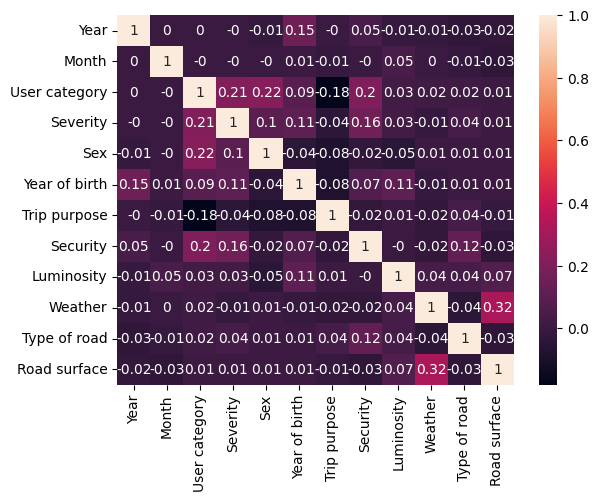

In [49]:
sns.heatmap(datanorm.corr().round(2), annot=True)

## PCA

In [50]:
#Normalization of the data
data = data.fillna(data.mean())
X = data.to_numpy()
Xstd = StandardScaler().fit_transform(X)

pca = PCA(n_components=2)
Xpca = pca.fit_transform(Xstd)

In [51]:
ccircle = []
eucl_dist = []
for i,j in enumerate(X .T):
    corr1 = np.corrcoef(j,Xpca[:,0])[0,1]
    corr2 = np.corrcoef(j,Xpca[:,1])[0,1]
    ccircle.append((corr1, corr2))
    eucl_dist.append(np.sqrt(corr1**2 + corr2**2))

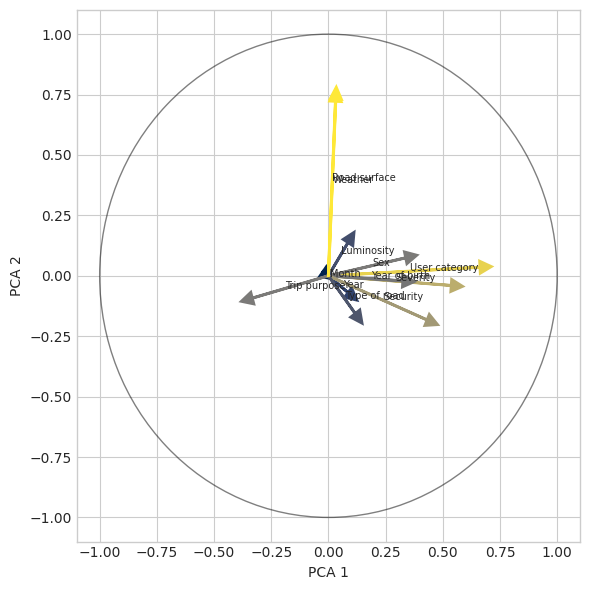

In [52]:
with plt.style.context('seaborn-v0_8-whitegrid'):
    fig, axs = plt.subplots(figsize=(6, 6))
    for i,j in enumerate(eucl_dist):
        arrow_col = plt.cm.cividis((eucl_dist[i] - np.array(eucl_dist).min())/\
                                (np.array(eucl_dist).max() - np.array(eucl_dist).min()) )
        axs.arrow(0,0, # Arrows start at the origin of the graphic
                 ccircle[i][0],  #0 for PC1
                 ccircle[i][1],  #1 for PC2
                 lw = 2, # establishment of line width
                 length_includes_head=True, 
                 color = arrow_col,
                 fc = arrow_col,
                 head_width=0.05,
                 head_length=0.05)
        # The labels of the arrows in relatively reasonable size
        axs.text(ccircle[i][0]/2,ccircle[i][1]/2, data.columns[i], fontsize=7)
    # Draw the unit circle
    circle = Circle((0, 0), 1, facecolor='none', edgecolor='k', linewidth=1, alpha=0.5)
    axs.add_patch(circle)
    axs.set_xlabel("PCA 1", fontsize=10)
    axs.set_ylabel("PCA 2", fontsize=10)

    axs.set_xlabel("PCA 1")
    axs.set_ylabel("PCA 2")
plt.tight_layout()
plt.show()

# Part 2 - Clusters

In this part, we will first display maps representing the accidents, then we'll perform various clusterings.

## Data filtering

In [53]:
# Select the columns that we want to keep and we rename it appropriately
columns = ['an', 'mois', 'grav', 'lat', 'long']

data = initial_data[columns]
data.columns = ['Year', 'Month', 'Severity', 'Latitude', 'Longitude']

# Delete all rows for which we have no information about location
data.dropna(axis=0, subset=['Latitude', 'Longitude'], inplace=True)

# Rearrange the 'Severity' numbers in ascending order
data['Severity'].replace({2: 4, 4: 2}, inplace=True)

# Create a dictionary with a description for each level of severity
severity_description = {
    1: "Unscathed",
    2: "Light injury",
    3: "Hospitalized wounded",
    4: "Killed"
}

data.reset_index(drop=True, inplace=True)
data

,Year,Month,Severity,Latitude,Longitude
0,5,1,2,5051500.0,294400.0
1,5,1,2,5051500.0,294400.0
2,5,1,3,5051500.0,294400.0
3,5,1,3,5051500.0,294400.0
4,5,1,1,5051500.0,294400.0
...,...,...,...,...,...
1583624,16,1,2,0.0,0.0
1583625,16,1,1,0.0,0.0
1583626,16,1,2,0.0,0.0
1583627,16,1,1,0.0,0.0


In [54]:
# Replace wrong characters with '0' and convert it to double
data['Longitude'] = data['Longitude'].replace('-', 0).astype('double')
data['Latitude'] = data['Latitude'].replace('-', 0).astype('double')

# Keep only the accidents located in mainland france
data = data.loc[(data['Longitude'] < 3*10**6) & (data['Latitude'] > 3*10**6) & (data['Latitude'] < 5.2*10**6)]

data.reset_index(drop=True, inplace=True)
data

,Year,Month,Severity,Latitude,Longitude
0,5,1,2,5051500.0,294400.0
1,5,1,2,5051500.0,294400.0
2,5,1,3,5051500.0,294400.0
3,5,1,3,5051500.0,294400.0
4,5,1,1,5051500.0,294400.0
...,...,...,...,...,...
949184,16,12,2,4887110.0,241310.0
949185,16,12,1,4887110.0,241310.0
949186,16,12,1,4887110.0,241310.0
949187,16,12,2,4885850.0,241411.0


## 1 - Maps

Let's first display in simple map of the all the accidents between 2005 and 2016:

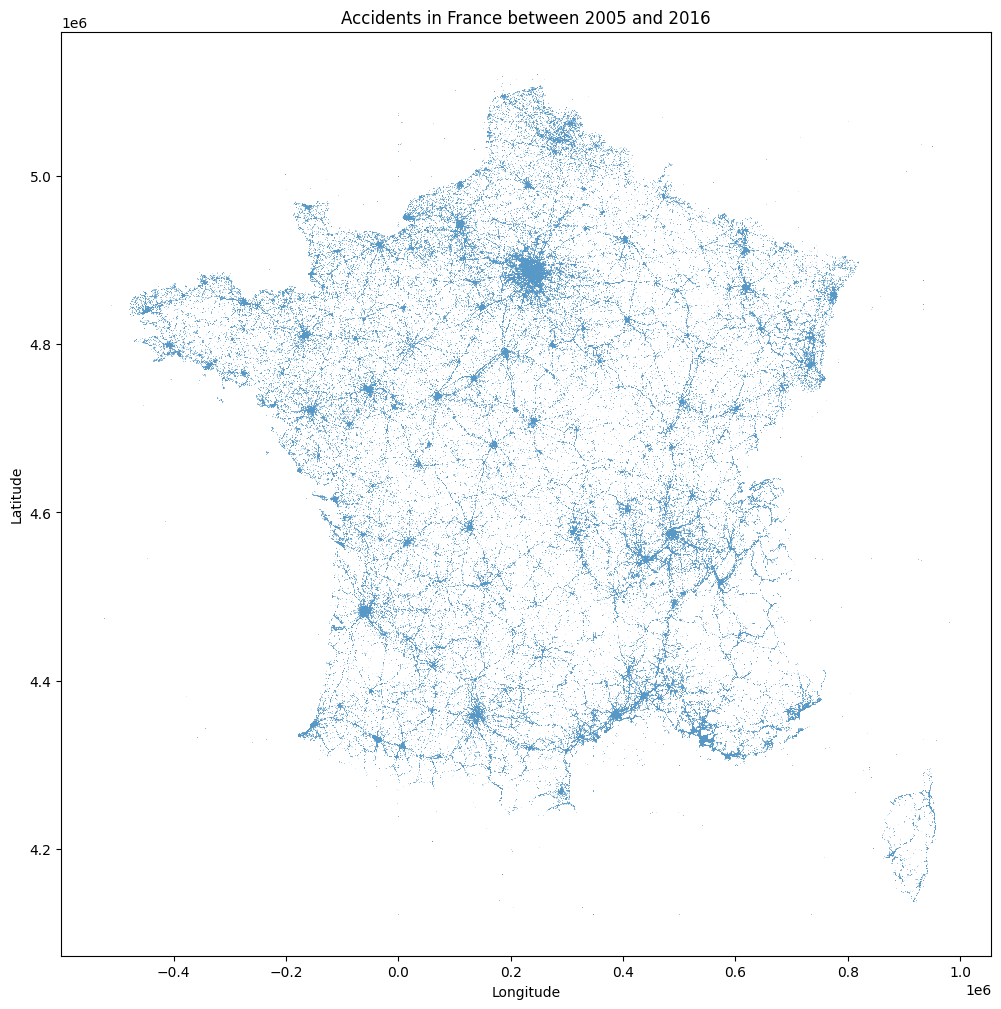

In [55]:
plt.figure(figsize=(12, 12))
sns.scatterplot(data=data, x='Longitude', y='Latitude', s=0.1)
plt.title("Accidents in France between 2005 and 2016")
plt.show()

We observe that a lot of accidents occur in the biggest cities: Paris, Marseille, Lyon...
Now, let's display a different map for each severity coefficient. This way, we will see if the accidents' location is different according to the severity.

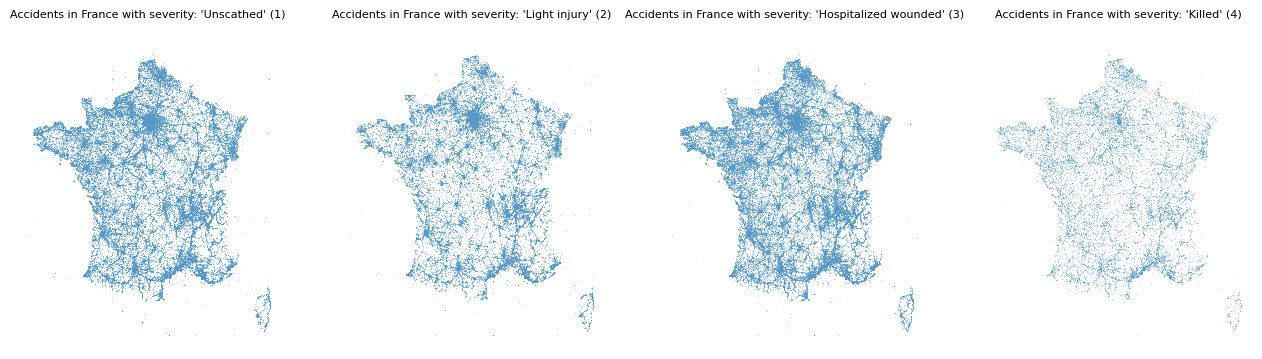

In [56]:
plt.figure(figsize=(16,4))

for i in range(1, 5):
    plt.subplot(1, 4, i)
    sns.scatterplot(data=data.loc[data['Severity']==i], x='Longitude', y='Latitude', s=0.1)
    plt.axis(False)
    plt.title(f"Accidents in France with severity: '{severity_description[i]}' ({i})", fontsize=8)
plt.show()

We observe that the location is not linked to the severity: accidents both severe and non-severe accidents occur in cities and on roads.

Let's try to display a map of the accidents for each year between 2005 and 2016. This way, we will see if the accidents' locations change over years.

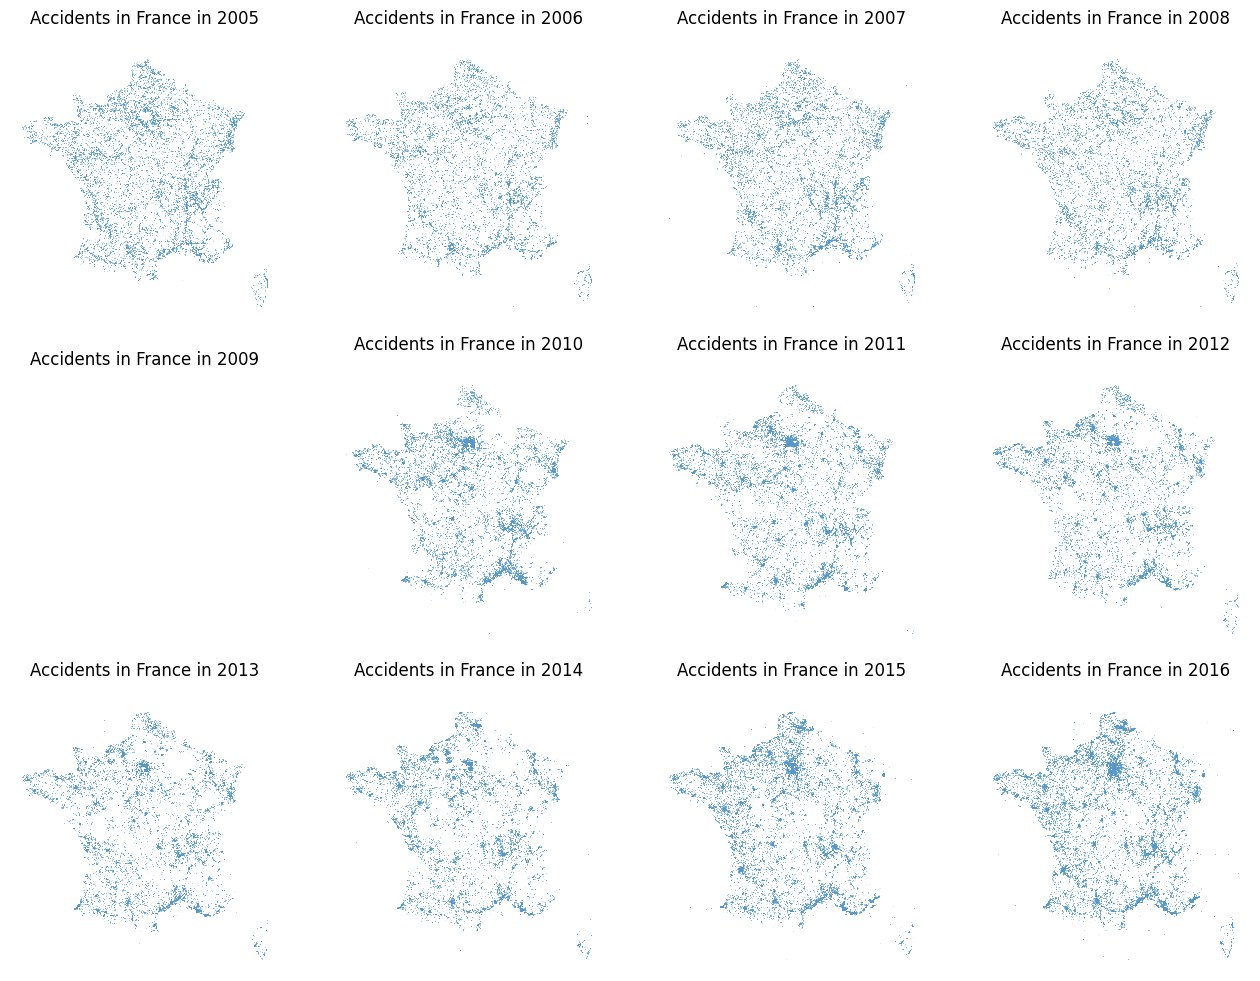

In [57]:
plt.figure(figsize=(16,12))

for i in range(1, 13):
    plt.subplot(3, 4, i)
    sns.scatterplot(data=data.loc[data['Year']==4+i], x='Longitude', y='Latitude', s=0.1)
    plt.axis(False)
    plt.title(f"Accidents in France in {2004 + i}")
plt.show()

At first glance, we can think that there are more accidents in the cities over years, but we have to be careful about the fact that we have not the same amount of data per year. For example, the 2009's accidents have no information about location, so we have no map. Therefore, the fact that there are more accidents in the cities is maybe due to the fact that we have more data in the most recent years.

In any case, we can note from the previous two blocks of code that the accidents are grouped around France's biggest cities. We will try to confirm this hypothesis thanks to clusters.

## 2 - Clusters

To verify our hypothesis, we will first use KMeans clustering method to divide the accidents into 15 clusters. In addition to that, we will plot on the map the 22 French metropolises. 

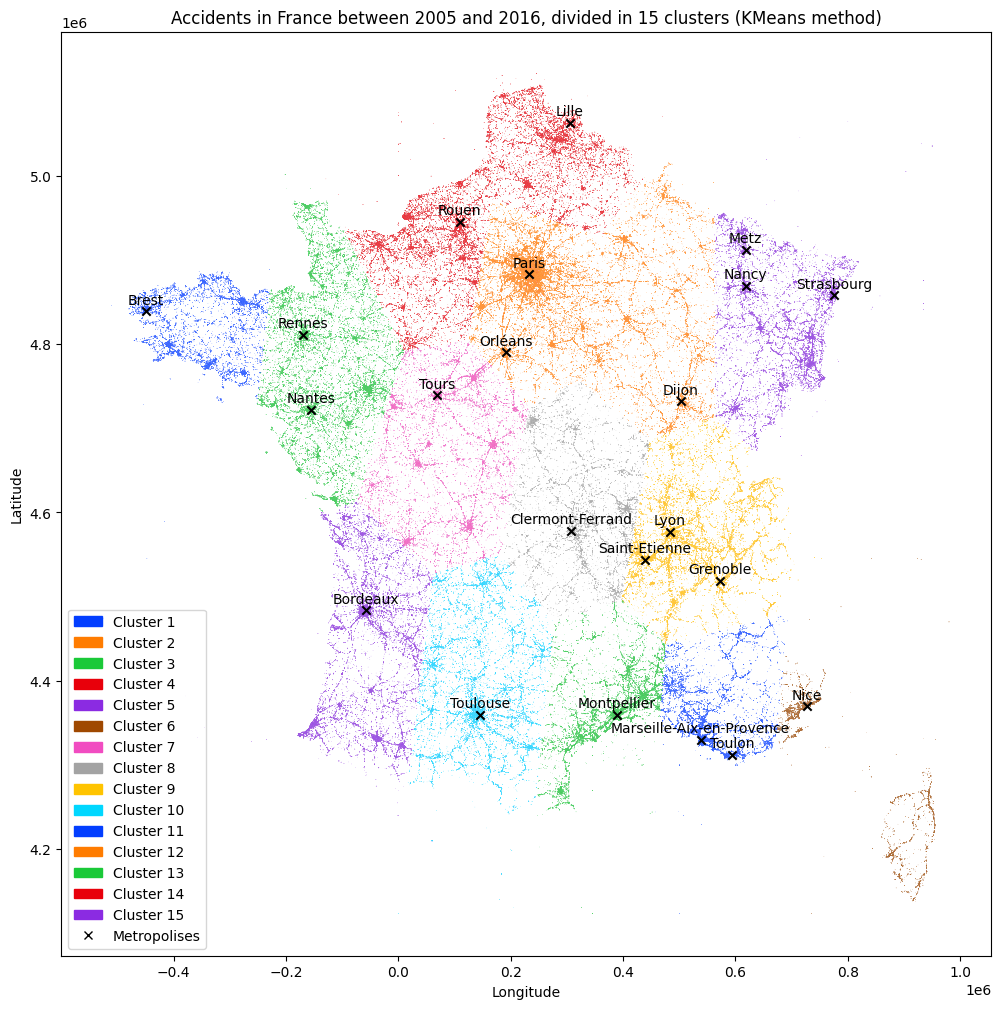

In [58]:
n_clusters = 15

# Perform KMeans clusterization
kmeans = KMeans(n_clusters=n_clusters, random_state=0, n_init='auto').fit(data[['Longitude', 'Latitude']])
labels = kmeans.labels_

# Create a figure and plot all the accidents with different colors according to the different clusters
plt.figure(figsize=(12,12))
sns.scatterplot(data=data, x="Longitude", y="Latitude", hue=labels, palette=sns.color_palette("bright", n_clusters), s=0.1)

# Define the longitude and latitude of the 22 french metropolises
metropolises_coordinates = {
    "Paris" : (2.33*10**5, 48.83*10**5),
    "Lille" : (3.05*10**5, 50.63*10**5),
    "Rouen" : (1.09*10**5, 49.45*10**5),
    "Metz" : (6.18*10**5, 49.12*10**5),
    "Nancy" : (6.18*10**5, 48.69*10**5),
    "Strasbourg" : (7.75*10**5, 48.58*10**5),
    "Brest" : (-4.49*10**5, 48.39*10**5),
    "Rennes" : (-1.69*10**5, 48.11*10**5),
    "Nantes" : (-1.56*10**5, 47.22*10**5),
    "Tours" : (0.69*10**5, 47.39*10**5),
    "Orléans" : (1.92*10**5, 47.90*10**5),
    "Dijon"  : (5.03*10**5, 47.32*10**5),
    "Clermont-Ferrand" : (3.08*10**5, 45.78*10**5),
    "Lyon" : (4.83*10**5, 45.77*10**5),
    "Saint-Etienne" : (4.39*10**5, 45.44*10**5),
    "Grenoble" : (5.73*10**5, 45.19*10**5),
    "Bordeaux" : (-0.58*10**5, 44.84*10**5),
    "Toulouse" : (1.45*10**5, 43.60*10**5),
    "Montpellier" : (3.89*10**5, 43.60*10**5),
    "Marseille-Aix-en-Provence" : (5.38*10**5, 43.30*10**5),
    "Toulon" : (5.94*10**5, 43.12*10**5),
    "Nice" : (7.27*10**5, 43.70*10**5)
}

# Add the metropolises to the plot
for city in metropolises_coordinates:
    plt.scatter(metropolises_coordinates[city][0], metropolises_coordinates[city][1], marker='x', color='black')
    plt.text(metropolises_coordinates[city][0], metropolises_coordinates[city][1] + 0.05*10**5, s=city, ha='center', va='bottom')

# Define the plot's legend
legend = []
for i, color in enumerate(sns.color_palette("bright", n_clusters)):
    legend.append(mpatches.Patch(color=color, label=f"Cluster {i + 1}"))

cross = Line2D([0], [0], label='Metropolises', marker='x', markeredgecolor='black', linestyle='')
legend.append(cross)

# Add the legend and show the result
plt.legend(handles=legend, loc='lower left')
plt.title(f"Accidents in France between 2005 and 2016, divided in {n_clusters} clusters (KMeans method)")
plt.show()

Here, we clearly see that the accidents are grouped around the different metropolises. However, as we didn't know what number of clusters was optimal, we chose 15 arbitrary. Indeed, the KMeans method needs the number of clusters as input to work. To be more rigorous, we can choose a method that determines by itself the optimal number of clusters, such as the DBSCAN method.

The DBSCAN uses different parameters than the KMeans method. The two main parameters are epsilon (`eps`) and the minimum samples (`min_samples`). The epsilon corresponds to the maximum distance between two points for them to be considered part of the same cluster. The minimum samples value is the minimum number of points that are needed to form a cluster. As we want the clusters to be cities, we fix it to 300 points.

To find the optimal epsilon value, we use the method described in [this article](https://iopscience.iop.org/article/10.1088/1755-1315/31/1/012012/pdf). First, we use the NearestNeighbors class to calculate the average distance between each point in the dataset and its nearest neighbors. Then, we sort it in ascending order, and we plot it. The ideal value will be equal to the distance value at the “crook of the elbow”, or the point of maximum curvature. This is what we do here:

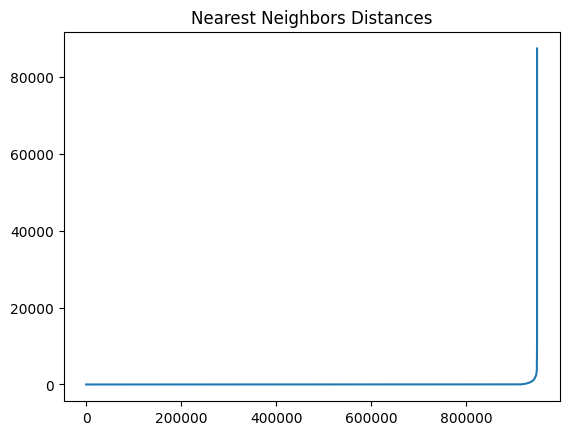

In [59]:
# Calculate the distance between each point and its nearest neighbors
neighbors = NearestNeighbors(n_neighbors=4)
neighbors_fit = neighbors.fit(data[['Longitude', 'Latitude']])
distances, indices = neighbors_fit.kneighbors(data[['Longitude', 'Latitude']])

# Sort it in ascending order
distances = np.sort(distances, axis=0)
distances = distances[:,1]

# Plot the distances
plt.figure()
plt.plot(distances, label='Distances')
plt.title("Nearest Neighbors Distances")
plt.show()

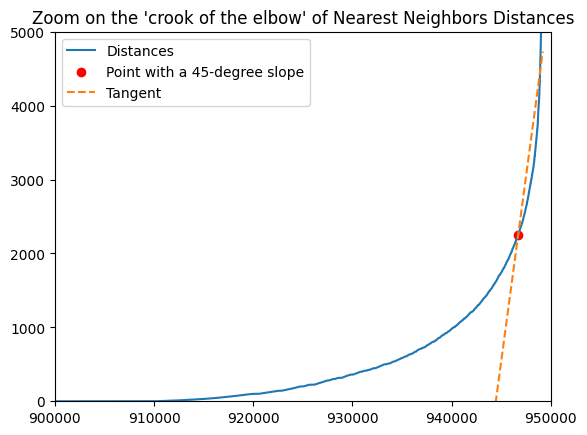

Optimal Epsilon value: 2249.2380932217916


In [60]:
# Plot the distances
plt.figure()
plt.plot(distances, label='Distances')

# We find the point of maximum curvature and calculate the tangent
point_index = np.argmin(np.abs(np.gradient(distances) - 1))
tangent_line = np.arange(len(distances)) - (point_index - distances[point_index])

# We plot the point and the tangent
plt.scatter(point_index, distances[point_index], color='red', label='Point with a 45-degree slope')
plt.plot(tangent_line, label=f'Tangent', linestyle='--')

# Zoom on the crook of the elbow
plt.legend()
plt.axis([900000, 950000, 0, 5000])
plt.title("Zoom on the 'crook of the elbow' of Nearest Neighbors Distances")
plt.show()

# Print the espilon value found
print(f"Optimal Epsilon value: {distances[point_index]}")

Now that we have the optimal epsilon value, we can apply the DBSCAN clustering method:

In [61]:
# Perform DBBSCAN clusterization method
db = DBSCAN(eps=2250, min_samples=300).fit(data[['Longitude', 'Latitude']])
labels = db.labels_

# Count and print the number of clusters
n_clusters = len(set(labels)) - 1
print(f"{n_clusters} clusters found.")

153 clusters found.


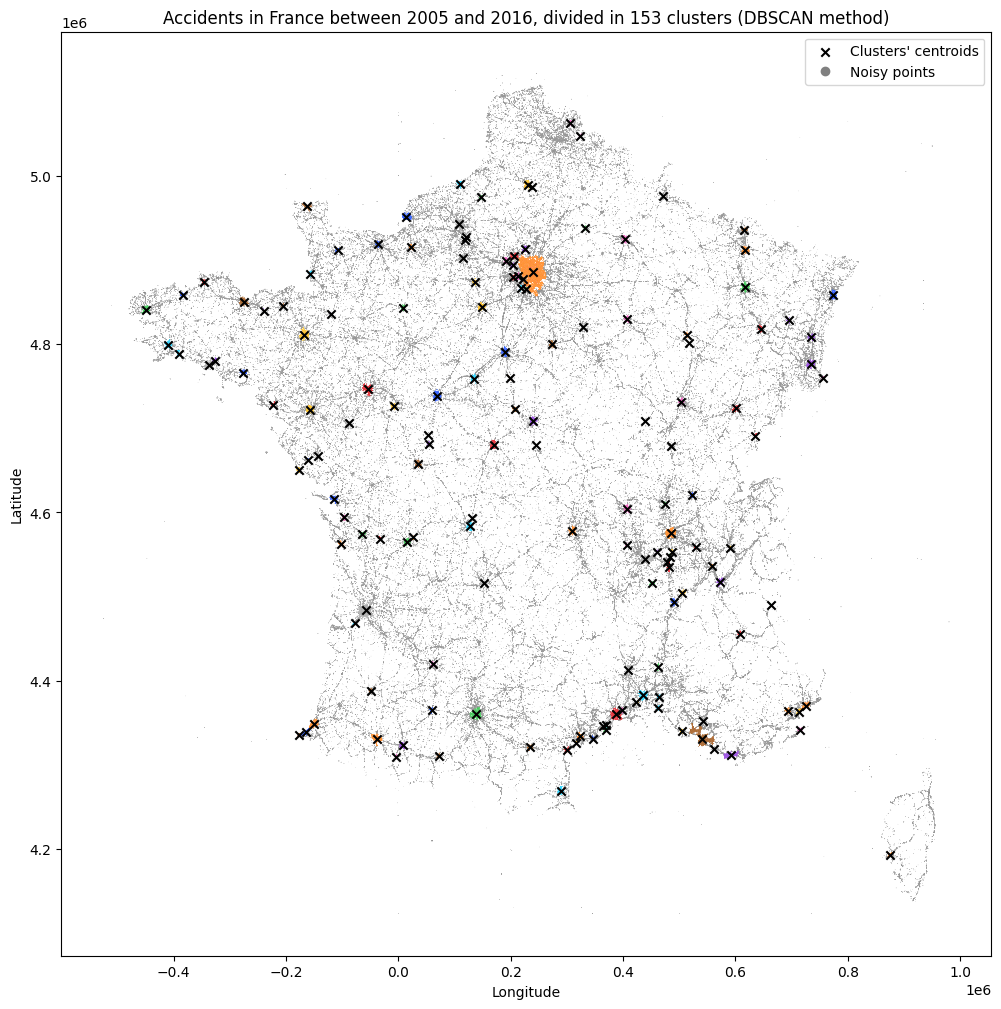

In [62]:
plt.figure(figsize=(12, 12))

# Create a custom palette where each cluster have a bright color, and unclassified points are gray
custom_palette = {}
palette = sns.color_palette('bright', n_clusters)

k=0
for cluster in set(labels):
    if cluster != -1:
        custom_palette[cluster] = palette[k]
        k+=1
    else:
        custom_palette[cluster] = (0.5, 0.5, 0.5)

# Create a column 'Cluster' with the corresponding cluster for each point
data['Cluster'] = labels

# Plot all the accidents with different colors using the custom palette
scatter = sns.scatterplot(data=data, x="Longitude", y="Latitude", hue='Cluster', palette=custom_palette, s=0.1, legend=None)

# Plot a marker on the centroids of each cluster
centroids = data.groupby('Cluster')[['Longitude', 'Latitude']].mean()
plt.scatter(centroids['Longitude'], centroids['Latitude'], marker='x', color='black', label="Clusters' centroids")

# Add noisy points to the figure's legend
legend, _ = scatter.get_legend_handles_labels()
point = Line2D([0], [0], label='Noisy points', marker='o', markerfacecolor='gray', markeredgecolor='gray', linestyle='')
legend.append(point)

# Show the legend and display the figure
plt.legend(handles=legend, loc='upper right')
plt.title(f"Accidents in France between 2005 and 2016, divided in {n_clusters} clusters (DBSCAN method)")
plt.show()

This map confirms our hypothesis: the clusters' centroids are located on the biggest French cities so this is where most accidents occur, particularly around Paris and on the mediterranean coast.

# Part 3 - Predictions

In this part, we will compare several classification models to determine which one can predict the best the severity of an accident

## Data filtering

Using the correlation matrix in the first part, we retain the features that are the most correlated to the accident's severity.

In [63]:
# Select the columns that we want to keep and we rename it appropriately
columns = ['catu', 'sexe', 'an_nais', 'secu', 'lum', 'atm', 'catr', 'surf', 'grav']

data = initial_data[columns]
data.columns = ['User category', 'Sex', 'Year of birth', 'Security', 'Luminosity', 'Weather', 'Type of road', 'Road surface', 'Severity']

# Delete all rows for which one or more column is empty (NA)
data.dropna(axis=0, inplace=True)

# Rearrange the 'Severity' numbers in ascending order
data['Severity'].replace({2: 4, 4: 2}, inplace=True)

data.reset_index(drop=True, inplace=True)
data

,User category,Sex,Year of birth,Security,Luminosity,Weather,Type of road,Road surface,Severity
0,1,1,1976.0,11.0,3,1.0,3.0,1.0,2
1,1,1,1976.0,11.0,3,1.0,3.0,1.0,2
2,1,2,1968.0,11.0,3,1.0,3.0,1.0,3
3,1,2,1968.0,11.0,3,1.0,3.0,1.0,3
4,2,1,1964.0,11.0,3,1.0,3.0,1.0,1
...,...,...,...,...,...,...,...,...,...
3499067,1,1,1967.0,21.0,1,1.0,2.0,1.0,2
3499068,2,1,1967.0,21.0,1,1.0,2.0,1.0,2
3499069,2,1,1967.0,21.0,1,1.0,2.0,1.0,2
3499070,1,1,1981.0,11.0,1,1.0,2.0,1.0,1


## Comparison of the different classofication method

We will now divide the table into two parts: one for training the models and another for testing them. As we have a very large dataset, we choose the following distribution: 60% for training and 40% for testing.

In [64]:
X = data.drop(columns='Severity').copy()
y = data[['Severity']].copy()

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.40, random_state=1234)

print(X_train.shape, X_test.shape)

(2099443, 8) (1399629, 8)


Now that the data is separated, we test 4 different classification models: Logit, NBayes, LDA and QDA. Then, we plot the accuracy metrics of each method.

Name   Accuracy  Precision  Recall  F1_score
--------------------------------------------
Logit    0.491     0.436     0.491    0.405
NBayes   0.478     0.434     0.478    0.413
LDA      0.493     0.458     0.493    0.415
QDA      0.478     0.444     0.478    0.417


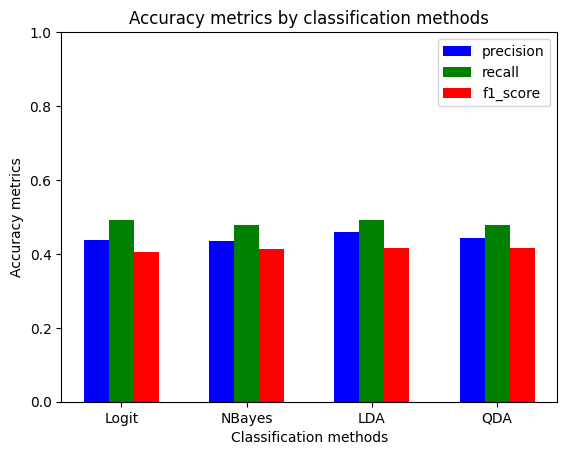

In [65]:
# Define the names of the classifications method
names = ["Logit", "NBayes", "LDA", "QDA"]

# Define the classifiers
classifiers = [LogisticRegression(C=1e5),
               GaussianNB(), 
               DA.LinearDiscriminantAnalysis(),
               DA.QuadraticDiscriminantAnalysis()
]

# Write the head line of the table describing the accuracy of each method
print('Name   Accuracy  Precision  Recall  F1_score\n'+44*'-')

# Create a new figure for the histogram
plt.figure()

# Loop through all different classfication methods
for name, clf in zip(names, classifiers):

    # Predict the diagnosis using the classifier
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    
    # Calculate the accuracy metrics
    accuracy = accuracy_score(y_test,y_pred)
    precision, recall, f1_score, _ = precision_recall_fscore_support(y_test, y_pred, average='weighted')
    
    # Print the classifier's name and its accuracy score
    print('{:6} {:7.3f} {:9.3f} {:9.3f} {:8.3f}'.format(name, accuracy, precision, recall, f1_score))

    # Create a bar in the histogram for each accuracy metrics
    plt.bar(names.index(name) - 0.2, precision, color='blue', width=0.2)
    plt.bar(names.index(name), recall, color='g', width=0.2)
    plt.bar(names.index(name) + 0.2, f1_score, color='r', width=0.2)

# Write the classification methods' names on the x axis
plt.xticks(range(len(names)), names)

# Add a xlabel, ylabel and title to the plot
plt.xlabel("Classification methods")
plt.ylabel("Accuracy metrics")
plt.title("Accuracy metrics by classification methods")

# Add the legend to the plot
plt.legend(["precision", "recall", "f1_score"])

# Increase the size of the plot so that the legend does not hide the metrics of the latest classification method.
plt.ylim(top=1)

# Show the plot
plt.show()

Thus, we observe that it is difficult to predict the severity of an accident because the correlations between the severity and the features we chose are too weak. However, the best classification model is Linear Discriminant Analysis (LDA), with a success rate of around 50%.